In [1]:
from __future__ import print_function
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
"""
Let us shown an example of resampling to a given frequency
"""

'\nLet us shown an example of resampling to a given frequency\n'

In [2]:
#Read dataset into pandas DataFrame
df = pd.read_csv('Data/chemical-concentration-readings.csv')

In [3]:
#Let's see the shape of the dataset
print('Shape of the dataset:', df.shape)

Shape of the dataset: (197, 2)


In [4]:
#Let's see first 5 rows of the DataFrame
df.head()

,Timestamp,Chemical conc.
0,1975-01-01 00:00:00,17.0
1,1975-01-01 02:00:00,16.6
2,1975-01-01 04:00:00,16.3
3,1975-01-01 06:00:00,16.1
4,1975-01-01 08:00:00,17.1


In [29]:
#The observations seem to be taken at an interval of 2 hours

In [5]:
#Parse the timestamp to datetime row index of the DataFrame
datetime_rowid = df['Timestamp'].map(lambda t: pd.to_datetime(t, format='%Y-%m-%d %H:%M:%S'))
df.index = datetime_rowid
df.head()

,Timestamp,Chemical conc.
Timestamp,,
1975-01-01 00:00:00,1975-01-01 00:00:00,17.0
1975-01-01 02:00:00,1975-01-01 02:00:00,16.6
1975-01-01 04:00:00,1975-01-01 04:00:00,16.3
1975-01-01 06:00:00,1975-01-01 06:00:00,16.1
1975-01-01 08:00:00,1975-01-01 08:00:00,17.1


In [6]:
#Resample and compute daily mean
daily = df['Chemical conc.'].resample('D')
daily_mean = daily.mean()

Text(0,0.5,'Chemical concentration')

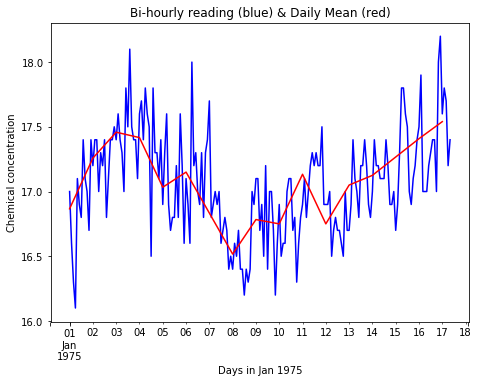

In [7]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(7.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Chemical conc.'].plot(ax=ax, color='b')
daily_mean.plot(ax=ax, color='r')

ax.set_title('Bi-hourly reading (blue) & Daily Mean (red)')
ax.set_xlabel('Days in Jan 1975')
ax.set_ylabel('Chemical concentration')

#plt.savefig('plots/ch2/B07887_02_02.png', format='png', dpi=300)

In [11]:
"""
Let us shown an example of grouping by a period
"""

'\nLet us shown an example of grouping by a period\n'

In [8]:
#Load the DataFrame and re-index the row to datetime64
df = pd.read_csv('Data/mean-daily-temperature-fisher-river.csv')
df.index = df['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))

In [9]:
#Display shape of the DataFrame
print('Shape of dataframe:', df.shape)

Shape of dataframe: (1461, 2)


In [10]:
#Let's see first rows
df.head()

,Date,Mean temparature
Date,,
1988-01-01,1988-01-01,-23.0
1988-01-02,1988-01-02,-20.5
1988-01-03,1988-01-03,-22.0
1988-01-04,1988-01-04,-30.5
1988-01-05,1988-01-05,-31.0


Text(0.5,1,'Mean daily temparature')

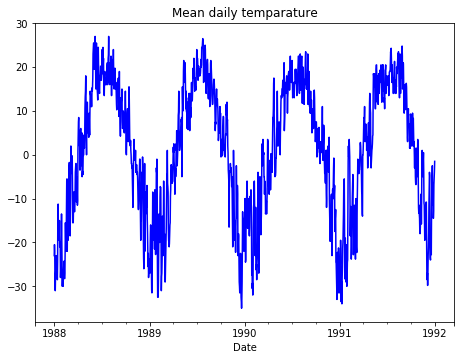

In [11]:
#Plot original time series on daily mean temparature
fig = plt.figure(figsize=(7.5, 5.5))
ax = fig.add_subplot(1,1,1)

df['Mean temparature'].plot(ax=ax, color='b')

ax.set_title('Mean daily temparature')

# plt.savefig('plots/ch2/B07887_02_03.png', format='png', dpi=300)

In [12]:
#We need to groupby the data for every month and find aggregate statistics

#Let's start by adding a Month_Year column
df['Month_Year'] = df.index.map(lambda d: d.strftime('%m-%Y'))

df.head()

,Date,Mean temparature,Month_Year
Date,,,
1988-01-01,1988-01-01,-23.0,01-1988
1988-01-02,1988-01-02,-20.5,01-1988
1988-01-03,1988-01-03,-22.0,01-1988
1988-01-04,1988-01-04,-30.5,01-1988
1988-01-05,1988-01-05,-31.0,01-1988


In [13]:
#Calculate month wise statistics
monthly_stats = df.groupby(by='Month_Year')['Mean temparature'].aggregate([np.mean, np.median,
                                                                           np.std
                                                                          ])
monthly_stats.reset_index(inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std
0,01-1988,-22.137097,-23.0,5.260640
1,01-1989,-17.129032,-18.0,8.250725
2,01-1990,-15.112903,-12.0,6.606764
3,01-1991,-23.038710,-24.5,7.095570
4,02-1988,-19.025862,-19.5,8.598522


In [14]:
#Let's create month and year columns and sort by them to reorder the rows
monthly_stats['Year'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%Y'))
monthly_stats['Month'] = monthly_stats['Month_Year']\
                        .map(lambda m: pd.to_datetime(m, format='%m-%Y').strftime('%m'))
monthly_stats.sort_values(by=['Year', 'Month'], inplace=True)
monthly_stats.head()

,Month_Year,mean,median,std,Year,Month
0,01-1988,-22.137097,-23.000,5.260640,1988,01
4,02-1988,-19.025862,-19.500,8.598522,1988,02
8,03-1988,-8.258065,-9.250,5.341459,1988,03
12,04-1988,2.641667,1.875,5.057720,1988,04
16,05-1988,11.290323,11.000,6.254364,1988,05


In [15]:
#Let's set the Month_Year as the row index
monthly_stats.index = monthly_stats['Month_Year']

Text(0.5,1,'Monthly statistics: Mean (blue) & Std. Dev. (red)')

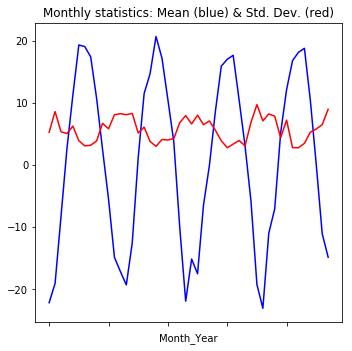

In [16]:
#Plot original time series and daily mean
fig = plt.figure(figsize=(5.5, 5.5))
ax = fig.add_subplot(1,1,1)

monthly_stats['mean'].plot(ax=ax, color='b')
monthly_stats['std'].plot(ax=ax, color='r')

ax.set_title('Monthly statistics: Mean (blue) & Std. Dev. (red)')

#plt.savefig('plots/ch2/B07887_02_04.png', format='png', dpi=300)

In [17]:
#Now we will calculate weekly moving average on the original time series of mean daily temparature
weekly_moving_average = df['Mean temparature'].rolling(7).mean()

In [18]:
#Now we will calculate monthly moving average on the original time series of mean daily temparature
monthly_moving_average = df['Mean temparature'].rolling(30).mean()

In [19]:
#Let's caluclate the weekly and monthly avergaes with a stride of length 2
weekly_moving_average_2stride = df['Mean temparature'].rolling(7).mean()[::2]
monthly_moving_average_2stride = df['Mean temparature'].rolling(30).mean()[::2]

Text(0.5,1,'Monthly moving average')

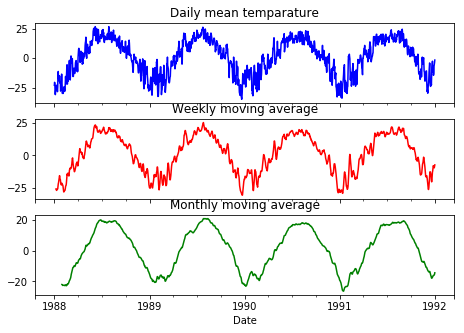

In [20]:
#Plot original time series and weekly moving average
fig, axarr = plt.subplots(3, sharex=True)
fig.set_size_inches(7.5, 5,5)

df['Mean temparature'].plot(ax=axarr[0], color='b')
axarr[0].set_title('Daily mean temparature')

weekly_moving_average.plot(ax=axarr[1], color='r')
axarr[1].set_title('Weekly moving average')

monthly_moving_average.plot(ax=axarr[2], color='g')
axarr[2].set_title('Monthly moving average')

#plt.savefig('plots/ch2/B07887_02_05.png', format='png', dpi=300)

In [21]:
# https://github.com/PacktPublishing/Practical-Time-Series-Analysis